In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


R^2 score: 1.0
F-test score
satisfaction_level
	F-value: 1.68851209029e+18
	p-value: 0.0
last_evaluation
	F-value: 167.253456936
	p-value: 4.70431155827e-38
number_project
	F-value: 312.939801278
	p-value: 2.52683592642e-69
average_montly_hours
	F-value: 6.0301205417
	p-value: 0.0140750354469
time_spend_company
	F-value: 154.147235583
	p-value: 3.20347275037e-35
Work_accident
	F-value: 51.8487935845
	p-value: 6.27917991521e-13
left
	F-value: 2663.88128476
	p-value: 0.0
promotion_last_5years
	F-value: 9.8388667636
	p-value: 0.00171193162672


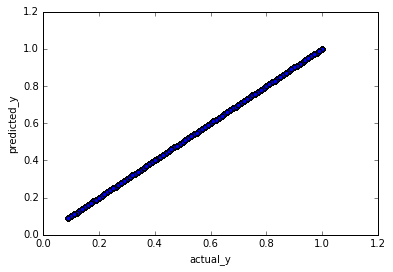

In [30]:
from sklearn import metrics
from sklearn import feature_selection
from sklearn import linear_model
model = linear_model.LinearRegression()
y = df["satisfaction_level"]
cols = df.columns.tolist()
cols.remove("sales")
cols.remove("salary")
X = df[cols]
model.fit(X, y)
pred = model.predict(X)
results = pd.DataFrame({"predicted_y":pred, "actual_y":y})
results.plot.scatter(x="actual_y", y="predicted_y")
print("R^2 score:", metrics.r2_score(y, pred))
print("F-test score")
columns = X.columns.tolist()
f_scores, p_values = feature_selection.f_regression(X, y)
indices = range(len(lower_bound))
for index in indices:
    print(columns[index])
    print("\tF-value:", f_scores[index])
    print("\tp-value:", p_values[index])
    
plt.show()


Confusion Matrix:
[[1234    2    1]
 [   2 7309    5]
 [   6   42 6398]]
F-test score
satisfaction_level
	F-value: 18.960895742
	p-value: 5.96735542568e-09
last_evaluation
	F-value: 3.19733201023
	p-value: 0.0408989661658
number_project
	F-value: 0.780740866011
	p-value: 0.458085138186
average_montly_hours
	F-value: 0.458362440778
	p-value: 0.63232711532
time_spend_company
	F-value: 18.6384489087
	p-value: 8.23130228991e-09
Work_accident
	F-value: 0.755247676908
	p-value: 0.469912090756
left
	F-value: 195.544493749
	p-value: 1.46086292588e-84
promotion_last_5years
	F-value: 74.8037836969
	p-value: 4.72185130764e-33


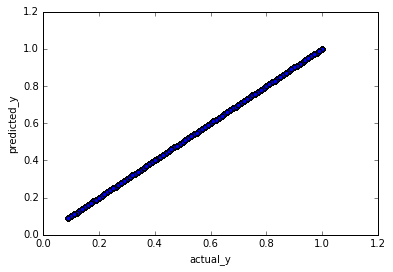

In [42]:
from sklearn import metrics
from sklearn import feature_selection
from sklearn import tree
from pandas.plotting import andrews_curves
model = tree.DecisionTreeClassifier()
y = df["salary"]
cols = df.columns.tolist()
cols.remove("sales")
salaries = df[cols]
cols.remove("salary")
X = df[cols]
model.fit(X, y)
pred = model.predict(X)
predicted_salaries = salaries.copy()
predicted_salaries["salary"] = pred
results.plot.scatter(x="actual_y", y="predicted_y")
print("Confusion Matrix:")
print(metrics.confusion_matrix(y, pred))
print("F-test score")
columns = X.columns.tolist()
f_scores, p_values = feature_selection.f_classif(X, y)
indices = range(len(lower_bound))
for index in indices:
    print(columns[index])
    print("\tF-value:", f_scores[index])
    print("\tp-value:", p_values[index])
    
plt.show()


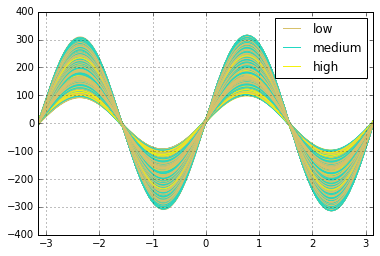

In [44]:
andrews_curves(salaries, "salary")
plt.show()

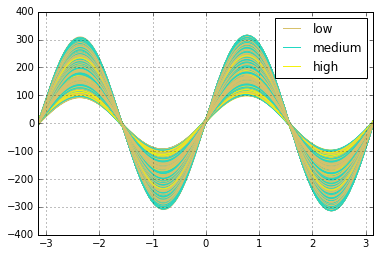

In [43]:
andrews_curves(predicted_salaries, "salary")
plt.show()